<a href="https://www.kaggle.com/code/ergunenesyazirlioglu/heart-failure-ml-83-1?scriptVersionId=250838026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
ExerciseAngina_coded = {'Y':1, 'N':0}

df['ExerciseAngina_Coded'] = df['ExerciseAngina'].map(ExerciseAngina_coded)
df.drop(columns=["ExerciseAngina"], inplace=True)
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'])

In [9]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ExerciseAngina_Coded,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,False,True,False,True,False,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,0,True,False,False,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,0,False,True,False,True,False,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,1,True,False,True,False,False,False,False,True,False,False,True,False
4,54,150,195,0,122,0.0,0,0,False,True,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,False,True,False,False,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,0,False,True,True,False,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,1,False,True,True,False,False,False,False,True,False,False,True,False
916,57,130,236,0,174,0.0,1,0,True,False,False,True,False,False,True,False,False,False,True,False


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

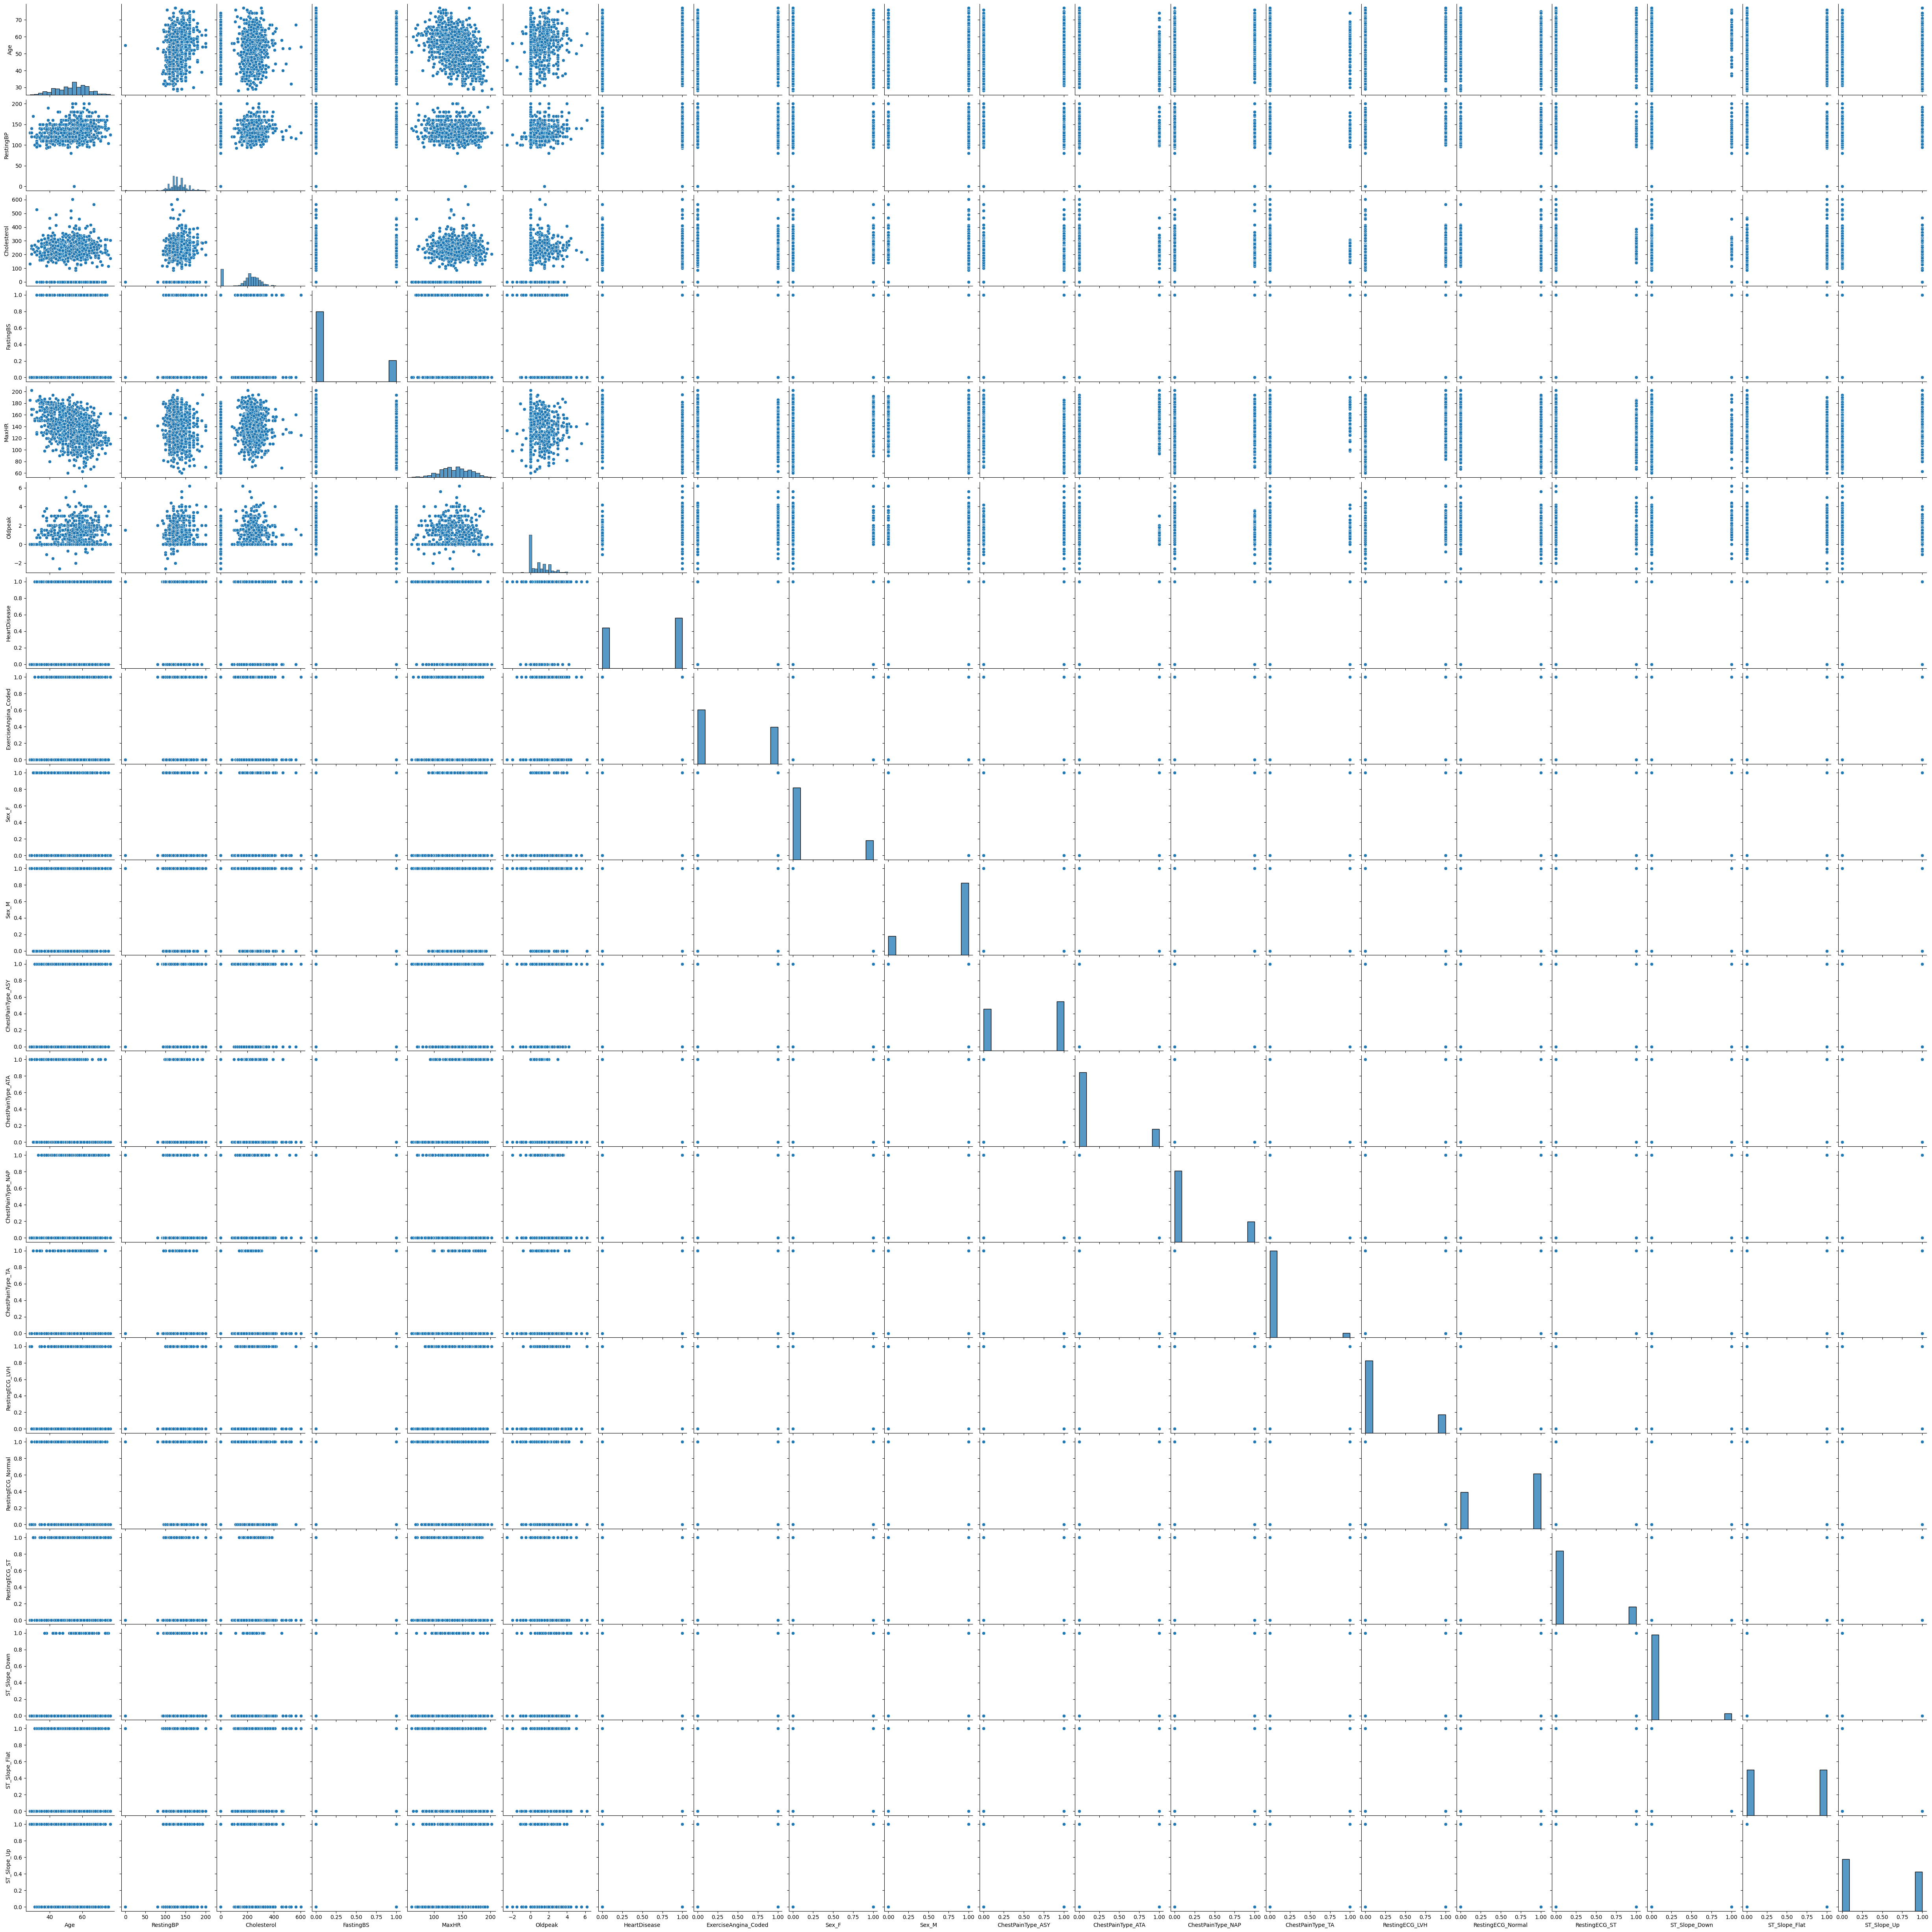

In [11]:
sns.pairplot(df_encoded)

                           Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                   1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP             0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol          -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS             0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR                -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak               0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease          0.282039   0.107589    -0.232741   0.267291 -0.400421   
ExerciseAngina_Coded  0.215793   0.155101    -0.034166   0.060451 -0.370425   
Sex_F                -0.055750  -0.005133     0.200092  -0.120076  0.189186   
Sex_M                 0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ASY     0.166607   0.048824    -0.120531   0.131176 -0.354963   
ChestPainType_ATA    -0.218165  -0.046153     0.1509

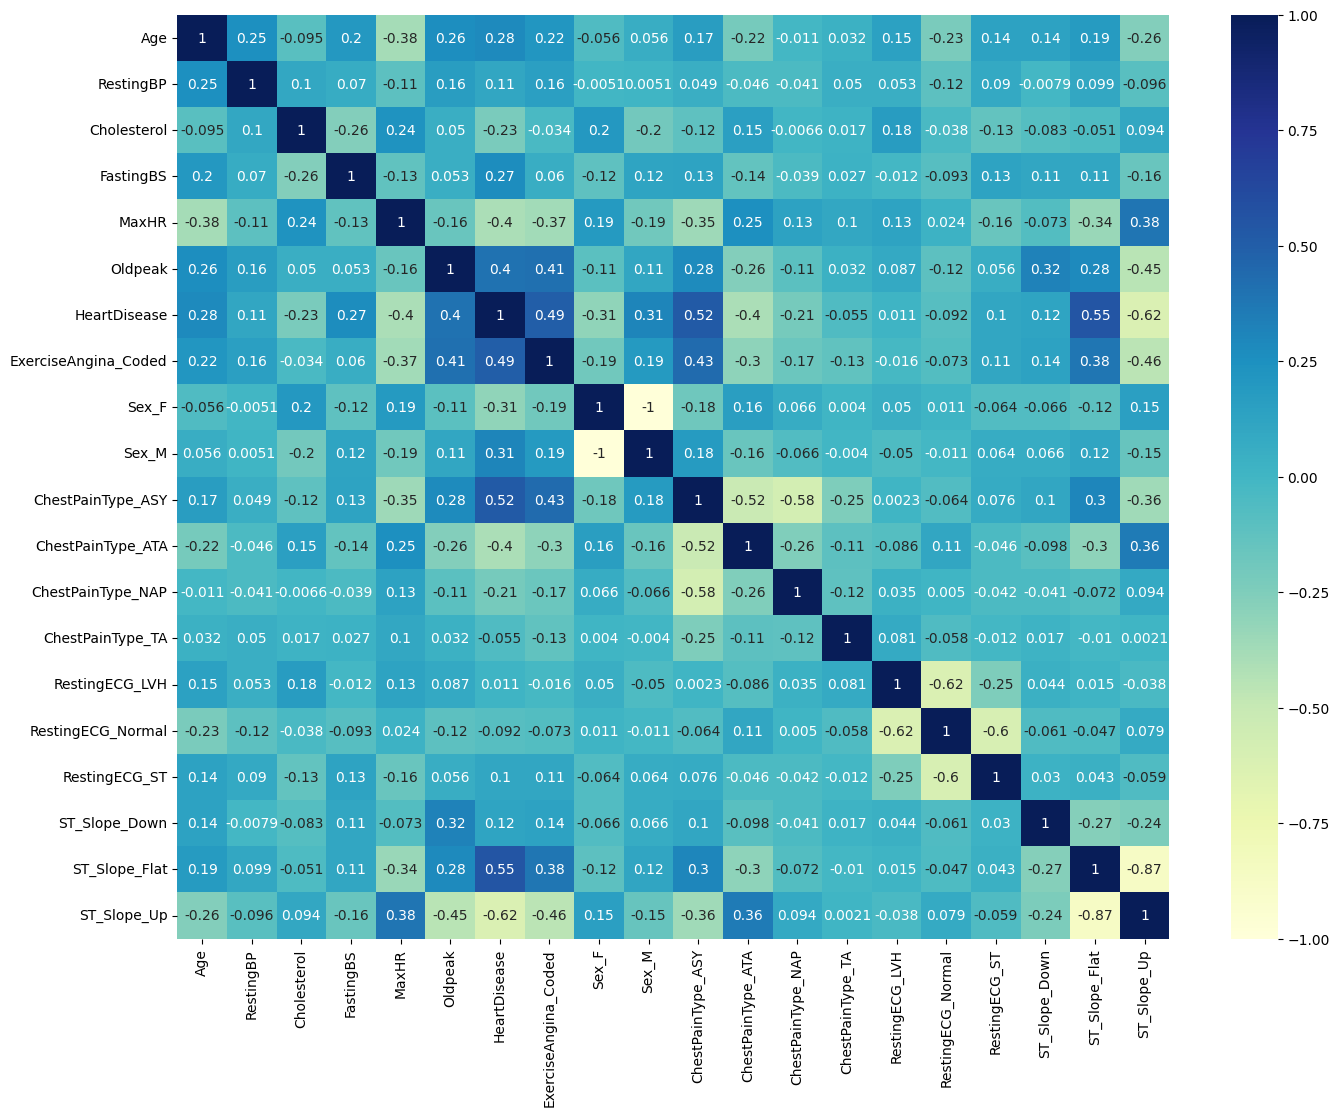

In [12]:
plt.figure(figsize=(16, 12))
co_mtx = df_encoded.corr(numeric_only=True)
print(co_mtx)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(
    n_estimators=40,
    max_depth=15,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=40, random_state=42)

In [17]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.96%


In [18]:
scores = cross_val_score(model, X, y, cv=5)
print("Score:", scores)
print("Average Accuracy:", scores.mean())
print("Std:", scores.std())

Score: [0.9076087  0.83695652 0.8423913  0.82513661 0.7431694 ]
Average Accuracy: 0.8310525065336185
Std: 0.052502788950192454


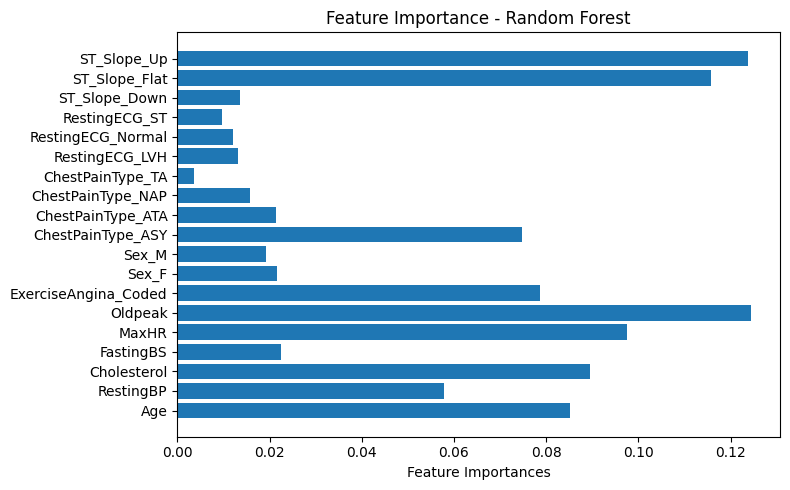

In [19]:
importances = model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importances")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()